<a href="https://colab.research.google.com/github/Viny2030/colabs/blob/main/Lazy_Frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **<font color="#07a8ed">API lazy VS API eager**

# Lazy evaluation
`Hasta el momento, todo lo que hemos ejecutado en nuestro DataFrame (df:polars.DataFrame) se ejecutó en modo Eager, es decir, de manera instantánea de acuerdo con lo que hemos definido en las celdas, tal cómo ocurriría si fuera un DataFrame de Pandas.`

`Sin embargo, Polars también tiene una forma Lazy para evaluar/ejecutar las instrucciones de código.`

`Esta forma Lazy permite a Polars evaluar la sintaxis de nuestro código/expresión, optimizarla y finalmente ejecutarla dentro de su engine. Esto permite, en general, mejorar aún más el rendimiento y optimizar el uso de la memoria. En modo Lazy, Polars crea y realiza un seguimiento de nuestro código en un plan lógico donde es capaz de optimizar y reordenar cada tarea antes de ejecutarlo. Vamos ahora a explorar un poco el universo de las Lazy Evaluations.`

In [1]:
!pip install polars -U  ## instalacion de polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0


In [2]:
!pip install polars[gpu] --extra-index-url=https://pypi.nvidia.com  ## instalacion de extra de nvidia para procesos

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of cudf-polars-cu12 to determine which version is compatible with other requirements. This could take a while.
  Using cached polars-1.13.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.5/32.5 MB 72.6 MB/s eta 0:00:00
  Created wheel for cudf-polars-cu12: filename=cudf_polars_cu12-24.10.1-py3-none-any.whl size=53357 sha256=3aeb03d20bbf944106c86e22714437316148c86f659d9e691bf2a11cccbae8f5
  Stored in directory: /root/.cache/pip/wheels/0b/60/a0/e6aa0053e52d34019bf87cb78f0215e71499afd0ca060b43f5
Successfully built cudf-polars-cu12
  Attempting uninstall: polars
    Found existing installation: polars 1.13.1
    Uninstalling polars-1.13.1:
      Successfully uninstalled polar

In [3]:
import polars as pl  ## importar polars

In [4]:
import polars as col  ## importar modulo columnas

In [5]:
%%time
casas = pl.read_csv("https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv")
casas   ### carga de dataset eager de polars

CPU times: user 10.9 ms, sys: 5.45 ms, total: 16.3 ms
Wall time: 190 ms


,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [6]:
casas.columns  ## descripcion de columnas del df casas

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [7]:
type(casas)

polars.dataframe.frame.DataFrame

In [8]:
casas_filtrado = casas.filter(pl.col('antiguedad')>10)  ## filtrado de casas por antiguedad mayor a 10 años
casas_filtrado

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
5,120000,0.68,31,14000,1152,22,4,1.0,8,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
6,153000,0.4,33,23300,2752,51,4,1.5,8,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1722,249000,0.43,41,45800,2426,61,4,2.0,7,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [9]:
casas_agregado = casas_filtrado.group_by('precio').agg(media_precios=pl.col('precio').mean()
)
casas_agregado  ### agrupo por precios y creo columna media precios en el group_by

precio,media_precios
i64,f64
315000,315000.0
295600,295600.0
186030,186030.0
169000,169000.0
112500,112500.0
…,…
106000,106000.0
148900,148900.0
178500,178500.0


In [10]:
type(casas_agregado)

polars.dataframe.frame.DataFrame


# **<font color="#07a8ed">Optimizaciones realizadas con el API Lazy**

`= en Pandas la funcion  filter es similar.`



### **Operaciones "Lazy" y "Eager"**

`Una característica única de Polars es su enfoque en las operaciones "Lazy" y "Eager". Las operaciones "Lazy" permiten construir una secuencia de operaciones en un DataFrame sin ejecutarlas de inmediato. Esto puede ser útil para optimizar el rendimiento y evitar cálculos innecesarios. Por otro lado, las operaciones "Eager" ejecutan inmediatamente las operaciones en el DataFrame y devuelven los resultados.`


In [11]:
%%time
query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .filter(pl.col('antiguedad')>10)
    .group_by('precio').agg(media_precio=pl.col('precio').mean()
    )
)
query

CPU times: user 188 µs, sys: 41 µs, total: 229 µs
Wall time: 231 µs


`Nuestra función se ha ejecutado sin problemas y nos ha devuelto un otro objeto LazyFrame. `
`Al intentar visualizar este objeto, cómo ya sabemos, nos salta su plan de ejecución no optimizado (NAIVE QUERY PLAN). Podemos visualizar los planes de ejecución (NAIVE QUERY PLAN/OPTIMIZED QUERY PLAN) de nuestro DataFrame a través del método: lazy_nhs_processed_df.show_graph(optimized_graph:bool)`

`Si comparamos el plan optimizado con el naive podemos notar que la optimizador de queries de Polars ha sido capaz de cambiar el orden de las transformaciones, poniendo la operación de filtrado de la columna "region_name" (FILTER BY) antes de la creación de las nuevas columnas (WITH COLUMNS).`

`Nota: Para poder visualizar los planos de ejecución puede ser necesario tener instalado graphviz en el sistema`

.

In [12]:
casas_agregado = query.collect()
casas_agregado

precio,media_precio
i64,f64
193777,193777.0
392499,392499.0
72000,72000.0
282000,282000.0
244900,244900.0
…,…
267000,267000.0
132870,132870.0
154500,154500.0


`Polars utiliza un enfoque de lazy execution, lo que significa que las operaciones no se ejecutan de inmediato. En su lugar, se registran como un plan de consulta, optimizando la secuencia de ejecución para obtener el resultado más eficiente. Este enfoque puede llevar a ganancias significativas en rendimiento.`

`Polars proporciona una interfaz de consulta similar a SQL, lo que te permite expresar manipulaciones de datos complejas de una manera más intuitiva y legible.`

`Polars se integra sin problemas con otras bibliotecas de Python como NumPy y Arrow, facilitando el trabajo con datos en diferentes formatos.`

In [13]:
query  ### metodo scan_csv genera un lazy frame no read_csv genera dataframe eager de polars

In [14]:
query.collect()  ## metodo collect ejecuta el lazy frame

precio,media_precio
i64,f64
282500,282500.0
186030,186030.0
177000,177000.0
210000,210000.0
242000,242000.0
…,…
205900,205900.0
203000,203000.0
300000,300000.0



# **<font color="#07a8ed">Cuando usar Lazy o Eager**


In [15]:
type(casas_agregado)

polars.dataframe.frame.DataFrame

In [16]:
casas_agregado ## dataset eager agrupado por precio y media precio

precio,media_precio
i64,f64
193777,193777.0
392499,392499.0
72000,72000.0
282000,282000.0
244900,244900.0
…,…
267000,267000.0
132870,132870.0
154500,154500.0


In [17]:
print(query.explain(streaming=True))  ## imprimir la query como lazy frame explicado

STREAMING:
  AGGREGATE
  	[col("precio").mean().alias("media_precio")] BY [col("precio")] FROM
    Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
    PROJECT 2/16 COLUMNS
    SELECTION: [(col("antiguedad")) > (10)]


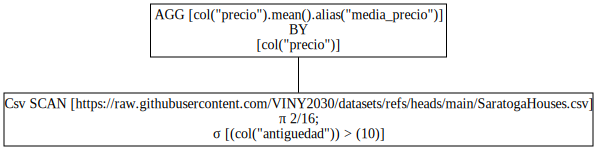

In [18]:
query.show_graph(optimized=True)  ##  observo el show graph con el detalle del lazy frame

`Al intentar visualizar este objeto, cómo ya sabemos, nos salta su plan de ejecución no optimizado (NAIVE QUERY PLAN). Podemos visualizar los planes de ejecución (NAIVE QUERY PLAN/OPTIMIZED QUERY PLAN) de nuestro DataFrame a través del método: query.show_graph(optimized=True`


# **<font color="#07a8ed">Uso de la consulta Lazy a partir de la lectura de un archivo**


`= en Pandas tengo la lectura de los archivos metodo read, ejemplo read_csv`







# **#En esta consulta le decimos a Polars que queremos:**

`Cargar datos desde el archivo csv`

`Realizar filtro universitarios mayores a 40`

`convertir la columna precio_terreno en la media`

`La consulta lazy no se ejecutará en este momento a menos que le apliquemos un .collect() .`

In [19]:

query_2 = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .filter(pl.col('universitarios') > 40)  # Move filter before select
    .select(
        pl.col('precio_terreno').mean().over('precio_terreno')
    )
)  ## descargo y filtro el datset por universitarios mayores a 40 y precio terreno con el valor de la media sobre el precio del terreno

query_2

In [20]:
print(query_2.explain(streaming=True))  ## imprimo el lazy plan

 SELECT [col("precio_terreno").mean().over([col("precio_terreno")])] FROM
  STREAMING:
    Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
    PROJECT 2/16 COLUMNS
    SELECTION: [(col("universitarios")) > (40)]


In [21]:
type(query_2)

polars.lazyframe.frame.LazyFrame

In [22]:
query_2.collect()  ## imprimimos la consulta lazy a traves del metodo collect()

precio_terreno
f64
22300.0
7300.0
18700.0
15000.0
23300.0
…
24200.0
36200.0
20400.0



# **<font color="#07a8ed">Uso de la API lazy desde un DataFrame**

`Una forma alternativa de acceder a la API lazy es llamar a .lazy en un DataFrame que ya se ha creado en la memoria`.

`Al llamar a .lazy convertimos el DataFrame en un LazyFrame.`

In [23]:
df = pl.DataFrame(
    {
        'id': [1, 2, 3],
        'nombre': ['Rosa', 'Ana', 'Pedro']
    }
)

df  ## cargo dataframe eager de polars

id,nombre
i64,str
1,"""Rosa"""
2,"""Ana"""
3,"""Pedro"""


In [24]:
df_lazy = df.lazy() ## conversion del dataset eager a dataset lazy

In [25]:
df_lazy  ## detalle dataset lazy

In [26]:
df_lazy.collect()## con el metodo collect el detalle del dataset lazy

id,nombre
i64,str
1,"""Rosa"""
2,"""Ana"""
3,"""Pedro"""



# **<font color="#07a8ed">Schema**

`= en Pandas es un parametro table_schema=None, en la funcion pd_gbq.to_gbq, en el servicio de web query de Pandas`

`El esquema de un DataFrame o un LazyFrame establece los nombres de las columnas y sus tipos de datos. Si recordamos podemos ver el esquema de un DataFrame o un LazyFrame con el método .schema.`

In [27]:
df.schema  ## el schema nos brinda las columnas y los tipos de datos de ellas

Schema([('id', Int64), ('nombre', String)])

In [28]:
df_lazy.schema  ## el schema en un lazy frame

<ipython-input-28-13d88cbe9906>:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df_lazy.schema  ## el schema en un lazy frame


Schema([('id', Int64), ('nombre', String)])

In [29]:
df_lazy.collect_schema()

Schema([('id', Int64), ('nombre', String)])


# **<font color="#07a8ed">Comprobación de tipos de datos en la API lazy**

`El esquema juega un papel importante en la API lazy.`


`= en Pandas no existe el metodo Lazy`

`Una ventaja de la API lazy es que Polars comprobará el esquema antes de procesar cualquier dato. Esta verificación ocurre cuando ejecutamos nuestra consulta lazy.`

`Vemos cómo funciona esto en el siguiente ejemplo donde llamamos a la expresión .round en la columna id del DataFrame que previamente hemos creado.El esquema juega un papel importante en la API lazy.`

`Una ventaja de la API lazy es que Polars comprobará el esquema antes de procesar cualquier dato. Esta verificación ocurre cuando ejecutamos nuestra consulta lazy.`

`Vemos cómo funciona esto en el siguiente ejemplo donde llamamos a la expresión .round en la columna id del DataFrame que previamente hemos creado.`

In [30]:
df_lazy.with_columns(pl.col('id').round(0)).collect()  ### redondeo columna id en o decimales

id,nombre
i64,str
1,"""Rosa"""
2,"""Ana"""
3,"""Pedro"""


`Los que ha sucedido es que la expresión .round solo es válida para columnas de tipo float. Llamar a .round en una columna de números enteros significa que la operación generará un error de tipo InvalidOperationError cuando evaluemos la consulta con collect. Esta verificación de esquema ocurre antes de que se procesen los datos cuando llamamos a collect.` = en pandas la funcion round es similar


# **<font color="#07a8ed">Manejo de operaciones no disponibles en la API lazy**

In [31]:
casas.columns  ## detalle de columnas en dataset casas

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [32]:
eager_query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(
        pl.col("antiguedad").cast(pl.Int64) # Convert 'antiguedad' to Int64
    )
    .collect()
    .pivot(   ## el lazy frame no tiene atributo pivot
        index='antiguedad',
        columns='calefaccion',
        values='habitaciones',
        aggregate_function='mean'
    )
)  ## cargue dataset eager con filtro columna antiguedad convertir la variable a Int64
### el pivoteo no funciono en el lazyframe



<ipython-input-32-618eecbc7a58>:2: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')


In [33]:
type(eager_query)

polars.dataframe.frame.DataFrame

In [34]:
eager_query  ## detalle eager_query

antiguedad,electric,hot water/steam,hot air
i64,f64,f64,f64
42,5.0,7.0,6.5
0,null,7.0,8.765432
133,null,9.5,null
13,6.666667,8.75,7.068966
31,null,7.5,7.076923
…,…,…,…
155,null,3.0,null
149,null,null,8.0
106,null,null,7.0


In [35]:
lazy_eager_query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(
        pl.col("antiguedad").cast(pl.Int64) # Convert 'antiguedad' to Int64
    )
    .collect()
).lazy()  ## cargue dataset eager con filtro columna antiguedad convertir la variable a Int64


In [36]:
lazy_eager_query  ## detalle lazy_eager_query   es lazy frame

In [37]:
type(lazy_eager_query)

polars.lazyframe.frame.LazyFrame

In [38]:
print(lazy_eager_query.collect()) ##leo el dataframe lazy con collect()

shape: (1_728, 16)
┌──────┬────────┬─────────────┬────────────┬───┬────────────┬────────────┬────────────┬────────────┐
│      ┆ precio ┆ metros_tota ┆ antiguedad ┆ … ┆ desague    ┆ vistas_lag ┆ nueva_cons ┆ aire_acond │
│ ---  ┆ ---    ┆ les         ┆ ---        ┆   ┆ ---        ┆ o          ┆ truccion   ┆ icionado   │
│ i64  ┆ i64    ┆ ---         ┆ i64        ┆   ┆ str        ┆ ---        ┆ ---        ┆ ---        │
│      ┆        ┆ f64         ┆            ┆   ┆            ┆ str        ┆ str        ┆ str        │
╞══════╪════════╪═════════════╪════════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ 0    ┆ 132500 ┆ 0.09        ┆ 42         ┆ … ┆ septic     ┆ No         ┆ No         ┆ No         │
│ 1    ┆ 181115 ┆ 0.92        ┆ 0          ┆ … ┆ septic     ┆ No         ┆ No         ┆ No         │
│ 2    ┆ 109000 ┆ 0.19        ┆ 133        ┆ … ┆ public/com ┆ No         ┆ No         ┆ No         │
│      ┆        ┆             ┆            ┆   ┆ mercial    ┆           


# **<font color="#07a8ed">Pan de ejecucion de una consulta en la  API lazy**

## **Plan de consulta**
`Para cualquier consulta lazy, Polars tiene ambos:`

`Un plan no optimizado: este contiene el conjunto de pasos en código que le proporcionamos.`
`Un plan optimizado: que contiene cambios realizados por el optimizador de consultas`

`= en Pandas la el metodo query es similar.`
`= en Pandas NO existe el lazy frame.`












In [39]:
casas.columns  ## columnas

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [40]:

query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .filter(pl.col('antiguedad') > 10)  ## filtra por antiguedad mayor a 10 años
    .group_by('precio')
    .agg(media_precio=pl.col('precio').mean(),
         media_habitaciones=pl.col('habitaciones').mean()) # Calcula la media de las habitaciones dentro del grupo
    )

In [ ]:
query ## detalle del lazy frame

In [41]:
query.collect()  ## consulta lazy ejecutada

precio,media_precio,media_habitaciones
i64,f64,f64
299000,299000.0,5.0
97000,97000.0,4.75
217500,217500.0,8.0
392499,392499.0,11.0
113000,113000.0,7.5
…,…,…
150600,150600.0,7.0
332000,332000.0,11.0
178000,178000.0,6.0


`Primero visualizaremos el plan no optimizado con la función show_graph estableciendo el parámetro optimized=False.` = en Pandas no existe esta funcion

Nota Importante:

`Para visualizar los gráficos será necesario instalar la librería graphviz la cual la podemos instalar ejecutando en una celda de código el comando pip install graphviz. Además, necesitará instalar el programa graphviz en su sistema operativo`.

In [42]:
!pip3 install graphviz  ## instalacion de graphivz para lectura del lazy frame

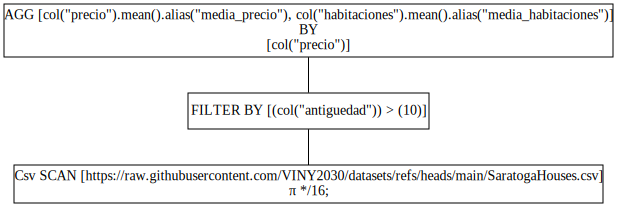

In [43]:
#  grafico el plan del lazyframe
query.show_graph(optimized=False)



`La visualización del plan de consulta debe leerse de abajo hacia arriba. Expliquemos como leer esta salida:**`

`Cada rectángulo corresponde a una etapa del plan de consulta`

`El sigma significa SELECCIÓN e indica cualquier condición de filtro`

`El pi significa PROYECCIÓN e indica la elección de un subconjunto de columnas`

In [44]:
# determinamos un objeto para el lazyframe.collect y ejecutar la consulta
result = query.collect()

In [45]:
result

precio,media_precio,media_habitaciones
i64,f64,f64
145500,145500.0,4.0
188900,188900.0,4.0
190100,190100.0,8.0
121000,121000.0,8.0
80500,80500.0,3.0
…,…,…
210500,210500.0,5.5
518000,518000.0,7.0
235000,235000.0,7.875


#Imprimir el plan de consulta

`= en Pandas no existe la funcion explain**`

`También podemos imprimir el plan no optimizado con explain(optimized=False).`

In [46]:
print(query.explain(optimized=False))  #3 se imprime el plan del lazy frame

AGGREGATE
	[col("precio").mean().alias("media_precio"), col("habitaciones").mean().alias("media_habitaciones")] BY [col("precio")] FROM
  FILTER [(col("antiguedad")) > (10)] FROM
    Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
    PROJECT */16 COLUMNS


In [47]:
print(query.explain())

AGGREGATE
	[col("precio").mean().alias("media_precio"), col("habitaciones").mean().alias("media_habitaciones")] BY [col("precio")] FROM
  Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
  PROJECT 3/16 COLUMNS
  SELECTION: [(col("antiguedad")) > (10)]



# **<font color="#07a8ed">Ejecucion de una consulta en la  API lazy**

In [48]:
query3 = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(antiguedad=(pl.col('antiguedad') > 60))
    .filter(pl.col('precio') > 50000) # Usar pl.col para su consistencia
)

In [49]:
query3

`Podemos ejecutar nuestra consulta en el conjunto de datos completo llamando al método .collect en la consulta.`

In [50]:
query3.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,bool,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,false,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,false,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,true,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,false,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,false,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,false,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,false,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,false,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


`Con el método por defecto collect, Polars procesa todos sus datos como un solo lote. Esto significa que todos los datos deben caber en la memoria disponible en el punto de mayor uso de la memoria en la consulta.`= en Pandas no existe este metodo


# **<font color="#07a8ed">Ejecución en datos más grandes que la memoria**


`Si nuestros datos requieren más memoria de la que tenemos disponible, es posible que Polars pueda procesar los datos en lotes (batches en inglés) utilizando el modo de streaming. Para usar el modo streaming simplemente pasamos el argumento streaming=True a collect.`

`= en Pandas no existe esta funcion`







In [51]:
query4 = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(antiguedad=(pl.col('antiguedad') > 60))
    .filter(pl.col('precio') > 50000) # Use pl.col aqui para su consistencia
    .collect(streaming=True)  #### le inclui el collect en la query
)

In [52]:
type(query4)

polars.dataframe.frame.DataFrame

In [53]:
query4

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,bool,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,false,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,false,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,true,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,false,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,false,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,false,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,false,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,false,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""



# **<font color="#07a8ed">Ejecución en un conjunto de datos parcial**

`Mientras escribimos, optimizamos o verificamos nuestra consulta en un conjunto de datos grande, consultar todos los datos disponibles puede provocar un proceso de desarrollo lento.`

`##En su lugar, podemos ejecutar la consulta con el método .fetch. `= en Pandas funciona para df.sql()

`El método .fetch toma un parámetro n_rows e intenta "obtener" (fetch) esa cantidad de filas en la fuente de datos.`


Sin embargo, no se puede garantizar el número de filas, ya que la API lazy no cuenta cuántas filas hay en cada etapa de la consulta.`

`= en Pandas funciona como min_rows() tambien.`

`






In [54]:
query5 = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(antiguedad=(pl.col('antiguedad') > 60))
    .filter(pl.col('precio') > 50000) # Use pl.col aqui para su consistencia

)
query5.fetch(n_rows=20)  ## toma las 20 filas pero señala que use el lazy frame

<ipython-input-54-f5fcf5b7c8ea>:7: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  query5.fetch(n_rows=20)  ## toma las 20 filas pero señala que use el lazy frame


,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,bool,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,false,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,false,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,true,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,false,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,false,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
15,89900,0.0,true,2500,936,57,3,1.0,4,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
16,155000,0.13,false,300,1300,41,3,1.5,7,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
17,253750,2.0,false,49800,2816,71,4,2.5,12,"""hot air""","""gas""","""none""","""No""","""No""","""Yes"""


In [55]:
query5.collect().head(20)  ## alternativa al fetch

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,bool,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,false,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,false,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,true,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,false,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,false,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
15,89900,0.0,true,2500,936,57,3,1.0,4,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
16,155000,0.13,false,300,1300,41,3,1.5,7,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
17,253750,2.0,false,49800,2816,71,4,2.5,12,"""hot air""","""gas""","""none""","""No""","""No""","""Yes"""



# **<font color="#07a8ed">Lazy Frames Agregaciones**

In [56]:
import polars as pl

lf = pl.LazyFrame(
    {
        'id': [1,2,3],
        'nombre': ['Jose', 'Ana', 'Rosa']
    }
)

lf

`La visualización del plan de consulta debe leerse de abajo hacia arriba. Expliquemos como leer esta salida:**`

`Cada rectángulo corresponde a una etapa del plan de consulta`

`El sigma significa SELECCIÓN e indica cualquier condición de filtro`

`El pi significa PROYECCIÓN e indica la elección de un subconjunto de columnas`

`Si tratamos de mostrar el LazyFrame como se muestra en la celda previa lo que obtendremos es una representación visual del plan de ejecució`n.

`Por tanto si deseamos mostrar el LazyFrame debemos convertirlo a un DataFrame con la función collect y luego mostrarlo.`

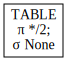

In [57]:
lf.show_graph()  ## plan de ejecucion del lazy frame

In [58]:
lf.collect()  ## leer el lazy frame con el metodo collect()

id,nombre
i64,str
1,"""Jose"""
2,"""Ana"""
3,"""Rosa"""


# **null_count**


`= en Pandas funciona como isnull().sum()`

`Esta función retorna el conteo de valores nulos de cada columna.`

In [59]:
df = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
)
df

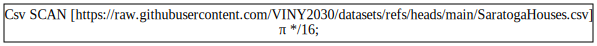

In [60]:
df.show_graph() ## se muestra el plan del lazy frame

In [61]:
df.collect()  ## leer el lazy frame a traves del metodo collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [62]:
df.null_count().collect()  ## nulos a traves de collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Sum**

`= en Pandas es similar`

`###Esta función devuelve la suma de los valores de cada columna del DataFrame.`

In [66]:
df.sum() ## funcion suma  de los valores de las  columnas del dataset menos las string

In [67]:
df.sum().collect()  ## funcion suma  de los valores de las  columnas del dataset menos las string

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
1492128,366278467,864.37,48239,59714820,3032598,96021,5451,3283.5,12168,null,null,null,null,null,null


# ***Min, Max y Mean***

`= en Pandas es similar`

`Esta funciones se comportan igual en un DataFrame o un LazyFrame.`

In [68]:
df.collect().min() ## funcion de minimo de las columnas numericas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,5000,0.0,0,200,616,20,1,0.0,2,"""electric""","""electric""","""none""","""No""","""No""","""No"""


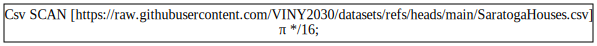

In [69]:
df.show_graph()

In [70]:
df.min().collect()  ## alternativa de la funcion de minimo de las columnas numericas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,5000,0.0,0,200,616,20,1,0.0,2,"""electric""","""electric""","""none""","""No""","""No""","""No"""


In [71]:
df.min()

In [72]:
df.max().collect()  ### funcion maximo de las columnas numericas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
1727,775000,12.2,225,412600,5228,82,7,4.5,12,"""hot water/steam""","""oil""","""septic""","""Yes""","""Yes""","""Yes"""


In [73]:
df.mean().collect()  ## media de las columnas numericas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str
863.5,211966.70544,0.500214,27.916088,34557.1875,1754.975694,55.567708,3.154514,1.900174,7.041667,null,null,null,null,null,null


In [74]:
df.std().collect()  ## desviacion estandard de las columnas numericas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str
498.974949,98441.391015,0.69868,29.209988,35021.168056,619.935553,10.333581,0.817351,0.658352,2.316453,null,null,null,null,null,null



# **<font color="#07a8ed">Lazy Frames Atributos**

## Columns

`= en Pandas es similar`


`Esta función realiza exactamente la misma función en un DataFrame que en un LazyFrame, devuelve una lista con los nombres de columna.`

In [75]:
df.columns  ## columnas del lazy frame

<ipython-input-75-17b786a3e796>:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  df.columns  ## columnas del lazy frame


['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [76]:
df.collect_schema().names()  ## nombre de las columnas

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

# **dtypes**

`= en Pandas es similar`

`Esta función devuelve los tipos de datos de las columnas de un LazyFrame.`

In [ ]:
df.dtypes  ## listado del tipo de datos de las columnas

<ipython-input-79-92bb4a27dd17>:1: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  df.dtypes  ## listado del tipo de datos de las columnas


[Int64,
 Int64,
 Float64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String]

In [77]:
df.collect_schema().dtypes()  ## alternativa de tipos de datos

[Int64,
 Int64,
 Float64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String]

# **schema**

`= en Pandas no existe esta funcion`

`Esta función devuelve el schema de un LazyFrame ,donde las llaves son los nombres de columnas y los valores son los tipos de datos de esa columna.`

In [78]:
df.collect_schema()  ## funcion de nombre de columna y tipo de datos

Schema([('', Int64),
        ('precio', Int64),
        ('metros_totales', Float64),
        ('antiguedad', Int64),
        ('precio_terreno', Int64),
        ('metros_habitables', Int64),
        ('universitarios', Int64),
        ('dormitorios', Int64),
        ('baños', Float64),
        ('habitaciones', Int64),
        ('calefaccion', String),
        ('consumo_calefacion', String),
        ('desague', String),
        ('vistas_lago', String),
        ('nueva_construccion', String),
        ('aire_acondicionado', String)])

In [79]:
df.schema.get('precio')  ## conseguir tipo de dato de la columna precio

<ipython-input-79-5e42e88a83ba>:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df.schema.get('precio')  ## conseguir tipo de dato de la columna precio


Int64

# **width**

`= en Pandas se utiliza shape(filas, columnas)`


`Esta función devuelve el número de columnas de un LazyFrame.`

In [80]:
df.width  ### Esta función devuelve el número de columnas de un LazyFrame.

<ipython-input-80-446702bef447>:1: PerformanceWarning: Determining the width of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().len()` to get the width without this warning.
  df.width  ### Esta función devuelve el número de columnas de un LazyFrame.


16

In [81]:
df.collect_schema().len()  ###alternativa devuelve el número de columnas de un LazyFrame.

16


# **<font color="#07a8ed">Lazy Frames Group_by**

#### Expresiones

Polars cuenta con expresiones. Las expresiones son el núcleo de muchas operaciones de ciencia de datos y son el concepto fundamental de Polars para su rendimiento muy rápido.

Algunas de estas operaciones importantes en la ciencia de datos son:

- tomar una muestra de filas de una columna
- multiplicar valores en una columna
- extraer una columna de años a partir de fechas
- convertir una columna de cadenas a minúsculas


Sin embargo, las expresiones también se utilizan dentro de otras operaciones:

- tomar la media de un grupo en una operación `groupby`
- calcular el tamaño de los grupos en una operación `groupby`
- tomando la suma horizontalmente a través de las columnas

Polars realiza estas transformaciones de datos centrales muy rápidamente con:

- optimización automática de consultas en cada expresión
- paralelización automática de expresiones en muchas columnas


# **Varias agregaciones**=
##en Pandas se utiliza agg de forma similar
## en Pandas no se utiliza alias para crear columnas
`Para realizar agregaciones sobre un LazyFrame primero debemos realizar un agrupado con la función group_by y luego utilizar la función agg.`

`Las agregaciones funcionan de de la misma forma a como lo estudiamos en la lección de GroupBy de los DataFrame de Polars.`

In [82]:
df.collect()  ## detalle de las columnas del lazy frame

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [83]:
df.group_by('precio').agg(
    pl.col('antiguedad').mean().alias('media_antiguedad'),## media columna antiguedad
    pl.col('antiguedad').min().alias('min_antiguedad'),
    pl.col('antiguedad').max().alias('max_antiguedad'),
    pl.count('dormitorios').alias('conteo_dormitorios'), #
    pl.sum('antiguedad').alias('suma_antiguedad'), # suma de columna antiguedad
    pl.first('antiguedad').alias('primer_antiguedad'), ## primer valor
    pl.last('antiguedad').alias('ultimo_antiguedad'), ## ultimo valor
    (pl.last('antiguedad') - pl.first('antiguedad')).alias('diferencia_antiguedad') # ultimo valor  menos el primero
)

In [84]:
df.group_by('precio').agg(
    pl.col('antiguedad').mean().alias('media_antiguedad'),## media columna antiguedad
    pl.col('antiguedad').min().alias('min_antiguedad'),
    pl.col('antiguedad').max().alias('max_antiguedad'),
    pl.count('dormitorios').alias('conteo_dormitorios'), #
    pl.sum('antiguedad').alias('suma_antiguedad'), # suma de columna antiguedad
    pl.first('antiguedad').alias('primer_antiguedad'), ## primer valor
    pl.last('antiguedad').alias('ultimo_antiguedad'), ## ultimo valor
    (pl.last('antiguedad') - pl.first('antiguedad')).alias('diferencia_antiguedad') # ultimo valor  menos el primero
).collect()

precio,media_antiguedad,min_antiguedad,max_antiguedad,conteo_dormitorios,suma_antiguedad,primer_antiguedad,ultimo_antiguedad,diferencia_antiguedad
i64,f64,i64,i64,u32,i64,i64,i64,i64
250000,17.625,8,25,8,141,19,15,-4
196900,35.0,35,35,1,35,35,35,0
282000,12.0,12,12,1,12,12,12,0
194000,64.0,64,64,1,64,64,64,0
214990,17.0,17,17,1,17,17,17,0
…,…,…,…,…,…,…,…,…
421000,5.0,5,5,1,5,5,5,0
154500,35.0,35,35,1,35,35,35,0
316250,0.0,0,0,1,0,0,0,0


In [85]:
df.collect().head(3)  ## dataframe lazy original

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [86]:
df.group_by('precio').agg(
    pl.col('antiguedad').mean().alias('media_antiguedad'),
    pl.col('antiguedad').min().alias('min_antiguedad'),
    pl.col('antiguedad').max().alias('max_antiguedad'),
    pl.count('dormitorios').alias('conteo_dormitorios'), #
    pl.sum('antiguedad').alias('suma_antiguedad'), #
    pl.first('antiguedad').alias('primer_antiguedad'), #
    pl.last('antiguedad').alias('ultimo_antiguedad'), #
    (pl.last('antiguedad') - pl.first('antiguedad')).alias('diferencia_antiguedad') #
).collect() ## utilizo el metodo collect ´para ver los detalles del dataframe

precio,media_antiguedad,min_antiguedad,max_antiguedad,conteo_dormitorios,suma_antiguedad,primer_antiguedad,ultimo_antiguedad,diferencia_antiguedad
i64,f64,i64,i64,u32,i64,i64,i64,i64
145000,25.411765,11,71,17,432,26,16,-10
216300,0.0,0,0,1,0,0,0,0
525000,1.0,1,1,1,1,1,1,0
164400,1.0,1,1,1,1,1,1,0
186030,38.0,38,38,1,38,38,38,0
…,…,…,…,…,…,…,…,…
219000,18.0,2,27,3,54,25,27,2
194500,40.5,40,41,2,81,41,40,-1
116900,20.0,20,20,1,20,20,20,0


In [87]:
df.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""



# **<font color="#07a8ed">Lazy Frames-Manipulacion y Seleccion**

`Debemos tener en cuenta que estas operaciones funcionan de la misma forma a como lo hacen con los DataFrame con algunas excepciones.`

# **botton_k**

`= en Pandas no existe esta funcion`

`Retorna los k elementos más pequeños del DataFrame. Le podemos indicar la cantidad de elementos que deseamos mostrar y por cual columna ordenar para obtener el resultado.`

In [88]:
# se ordena por la columna de antiguedad en forma descendente los nulos al final
result = df.sort(by=['antiguedad'], descending=[True], nulls_last=True)
result

In [89]:
result.collect()  ## observamos el dataset ordenado por antiguedad

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
62,82800,0.11,225,3900,1483,52,3,1.0,7,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""
33,227000,1.8,201,25500,1876,52,3,2.5,5,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
140,135000,3.0,178,44500,3020,41,4,2.5,12,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
1685,422680,0.16,176,46200,4486,51,6,4.0,12,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
980,154000,0.1,174,32800,1364,63,5,1.0,9,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1468,295925,0.56,0,108900,2134,40,4,2.5,9,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""No"""
1484,355063,0.36,0,13000,2256,64,4,2.5,8,"""hot air""","""gas""","""septic""","""No""","""Yes""","""Yes"""
1588,365000,0.56,0,37900,2950,64,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


# **drop**
`=  en Pandas funciona de forma similar`

`Elimina la(s) columna(s) seleccionada(s).`

In [90]:
df.drop('nueva_construccion').collect()  ## dropeamos columna 'nueva_construccion'

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No"""


In [91]:
df.collect_schema().names()  ## nombres de columnas del df ojo se borra en la consulta anterior

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

# **Filtrar un DataFrame**

##### Contexto `filter`

`En este contexto, se filtra el marco de datos existente en función de la expresión arbitraria que se evalúa como el tipo de datos booleano.`

In [92]:
df.filter(pl.col('precio') > 10000).filter((pl.col('antiguedad')>10) & (pl.col('precio')>50000)).select(  ## filtro precio mayor a 50000, antiguedad mayor a 10
    [  ## agrego columnas con medias, conteo, suma, minimo, maximo, primer valor ultimo valor segun el filtro
        pl.col('precio').mean().alias('precio_mean'),
        pl.col('dormitorios').count().alias('conteo_dormitorios'),
        pl.col('antiguedad').sum().alias('suma_antiguedad'),
        pl.col('antiguedad').min().alias('min_antiguedad'),
        pl.col('antiguedad').max().alias('max_antiguedad'),
        pl.col('antiguedad').first().alias('primer_antiguedad'),
        pl.col('antiguedad').last().alias('ultimo_antiguedad'),
        (pl.col('antiguedad').last() - pl.col('antiguedad').first()).alias('diferencia_antiguedad')
    ]
).collect()


precio_mean,conteo_dormitorios,suma_antiguedad,min_antiguedad,max_antiguedad,primer_antiguedad,ultimo_antiguedad,diferencia_antiguedad
f64,u32,i64,i64,i64,i64,i64,i64
193701.342899,1359,46559,11,225,42,86,44


## ***with_context***
`= en Pandas no existe esta funcion`

`Esta función agrega un contexto externo al gráfico de cálculo. Esto permite que las expresiones también accedan a columnas de DataFrames que no forman parte de este.`

In [93]:
tarjetas_lz = pl.LazyFrame({'tarjeta': ['bronce', 'plata', 'oro']})

descuentos_lz = pl.LazyFrame({'descuento': [10, 20, 30]})


In [94]:
tarjetas_lz.collect()

tarjeta
str
"""bronce"""
"""plata"""
"""oro"""


In [95]:
descuentos_lz.collect()

descuento
i64
10
20
30


In [96]:
## es un metodo de concat de with context
tarjetas_lz.with_context(descuentos_lz).select(
    pl.col('tarjeta'), # Use pl.col
    pl.col('descuento') # Use pl.col
).collect()

<ipython-input-96-be67cc1cbec5>:2: DeprecationWarning: `LazyFrame.with_context` is deprecated. Use `pl.concat(..., how='horizontal')` instead.
  tarjetas_lz.with_context(descuentos_lz).select(


tarjeta,descuento
str,i64
"""bronce""",10
"""plata""",20
"""oro""",30


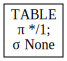

In [97]:
tarjetas_lz.show_graph()

# **slice**

`= en Pandas funciona como df[1,10]`


`Con esta función podemos obtener una porción o lo que en inglés se conoce como un slice de un DataFrame.`

In [98]:
df.slice(1,10).collect()  ## porcion del dataframe ( desde , hasta fila inclusive)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
5,120000,0.68,31,14000,1152,22,4,1.0,8,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
6,153000,0.4,33,23300,2752,51,4,1.5,8,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
7,170000,1.21,23,14600,1662,35,4,1.5,9,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
8,90000,0.83,36,22200,1632,51,3,1.5,8,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
9,122900,1.94,4,21200,1416,44,3,1.5,6,"""hot air""","""gas""","""none""","""No""","""No""","""No"""


# **sort**

`= en Pandas es la misma funcion`

`Esta función ordena el LazyFrame por la(s) columna(s) proporcionadas`

In [99]:
df.sort('antiguedad', descending=True, nulls_last=True).collect()  ## ordenar en forma descencente con los nulos al final

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
62,82800,0.11,225,3900,1483,52,3,1.0,7,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""
33,227000,1.8,201,25500,1876,52,3,2.5,5,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
140,135000,3.0,178,44500,3020,41,4,2.5,12,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
1685,422680,0.16,176,46200,4486,51,6,4.0,12,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
980,154000,0.1,174,32800,1364,63,5,1.0,9,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1468,295925,0.56,0,108900,2134,40,4,2.5,9,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""No"""
1484,355063,0.36,0,13000,2256,64,4,2.5,8,"""hot air""","""gas""","""septic""","""No""","""Yes""","""Yes"""
1588,365000,0.56,0,37900,2950,64,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


# **gather_every**

`= en Pandas  no fue encontrada`

`Toma cada enésima fila del LazyFrame y regresa un nuevo LazyFrame. El primer parámetro estable cada cuantas filas queremos tomar la siguiente fila y el parámetro offset establece desde que posición queremos iniciar a tomar las filas.`

In [100]:
df.gather_every(5, 100).collect() ##  iniciamos desde la fila 100 agrupa cada 5 filas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
100,110000,0.59,10,3100,936,44,3,1.0,6,"""hot air""","""gas""","""septic""","""No""","""No""","""Yes"""
105,225000,2.37,8,3300,1784,44,3,2.0,6,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
110,112500,0.72,43,4600,1232,44,3,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
115,192000,0.82,0,5000,1880,44,3,2.5,9,"""hot air""","""gas""","""septic""","""No""","""Yes""","""Yes"""
120,75000,1.0,45,8000,1008,44,3,1.0,7,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1705,221450,0.36,121,33000,2699,61,6,1.0,12,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
1710,388000,0.77,9,74400,2762,61,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""
1715,70000,1.34,34,36700,1313,61,2,1.5,3,"""electric""","""electric""","""septic""","""No""","""No""","""No"""


# **shift**
`= en Pandas se utiliza conm groupby.shift`

`Esta función cambia los valores según el número dado de índices. En la práctica lo podemos ver como un desplazamiento de las filas del LazyFrame.`

In [101]:
df.shift(3).collect()  ## desplazamiento de las filas del dataset

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1720,436023,0.41,5,43400,2718,61,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""Yes"""
1721,319900,0.58,42,31400,2464,61,4,2.5,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1722,249000,0.43,41,45800,2426,61,4,2.0,7,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [102]:
df.shift(3, fill_value='prueba').collect()  ## se rellena las filas con un valor

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba"""
"""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba"""
"""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba"""
"""0""","""132500""","""0.09""","""42""","""50000""","""906""","""35""","""2""","""1.0""","""5""","""electric""","""electric""","""septic""","""No""","""No""","""No"""
"""1""","""181115""","""0.92""","""0""","""22300""","""1953""","""51""","""3""","""2.5""","""6""","""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""1720""","""436023""","""0.41""","""5""","""43400""","""2718""","""61""","""4""","""2.5""","""12""","""hot air""","""gas""","""public/commercial""","""No""","""No""","""Yes"""
"""1721""","""319900""","""0.58""","""42""","""31400""","""2464""","""61""","""4""","""2.5""","""8""","""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
"""1722""","""249000""","""0.43""","""41""","""45800""","""2426""","""61""","""4""","""2.0""","""7""","""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""


# **inspect**

`= en Pandas no existe esta funcion`

`Esta función inspecciona un nodo en el gráfico de cálculo. Con ella podemos imprimir el valor que evalúa este nodo en el gráfico de cálculo.`

In [103]:
query_inspect = (
    df.with_columns(precio=(pl.col('precio') > 60000))
    .inspect()
    .select(  ## selecciono las columnas de antiguedad y precio ´previo filtrado precio mayor a 60000
        pl.col('antiguedad'), #
        pl.col('precio')     #
    )
)

In [104]:
query_inspect.collect()  ## produce en la columna precio una columna booleana

shape: (1_728, 2)
┌────────┬────────────┐
│ precio ┆ antiguedad │
│ ---    ┆ ---        │
│ bool   ┆ i64        │
╞════════╪════════════╡
│ true   ┆ 42         │
│ true   ┆ 0          │
│ true   ┆ 133        │
│ true   ┆ 13         │
│ true   ┆ 0          │
│ …      ┆ …          │
│ true   ┆ 32         │
│ true   ┆ 37         │
│ true   ┆ 9          │
│ true   ┆ 48         │
│ true   ┆ 86         │
└────────┴────────────┘


antiguedad,precio
i64,bool
42,true
0,true
133,true
13,true
0,true
…,…
32,true
37,true
9,true


In [105]:
print(query_inspect.explain())  ## explica en inspect

simple π 2/2 ["antiguedad", "precio"]
  OPAQUE_PYTHON
     WITH_COLUMNS:
     [[(col("precio")) > (60000)].alias("precio")] 
      Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
      PROJECT 2/16 COLUMNS



# **<font color="#07a8ed">Lazy Frames-Miscelanea**

# **map_batches**

`= en Pandas con funcion apply. df.apply`

`Esta función permite aplicar una función personalizada a un LazyFrame. Es importante que la función personalizada devuelva un DataFrame de Polars.`

In [106]:
(
 df.select(
  pl.col('antiguedad'),
  pl.col('precio')
 )
 ###.map_batches(lambda c: (c / 60).cast(pl.Int64)) # Cast to pl.Int64
 #
).collect()

antiguedad,precio
i64,i64
42,132500
0,181115
133,109000
13,155000
0,86060
…,…
32,289000
37,285000
9,194900


In [107]:
(
 df.select(
  pl.col('antiguedad'),
  pl.col('precio')
 )
 .map_batches(lambda c: (c / 60).cast(pl.Int64)) # aplica lambda en las dos columna resultado entero
 #
).collect()

antiguedad,precio
i64,i64
0,2208
0,3018
2,1816
0,2583
0,1434
…,…
0,4816
0,4750
0,3248


# **profile**

`= funcion no existe en Pandas`

`Esta función perfila un LazyFrame, es decir, ejecutará la consulta y devolverá una tupla que contiene el DataFrame materializado y un DataFrame que contiene información de perfil de cada nodo que se ejecuta. Las unidades de los tiempos son microsegundos.`

`Con el parámetro show_plot=True mostraremos un diagrama de Gantt del resultado del perfilado.`

In [110]:
df.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


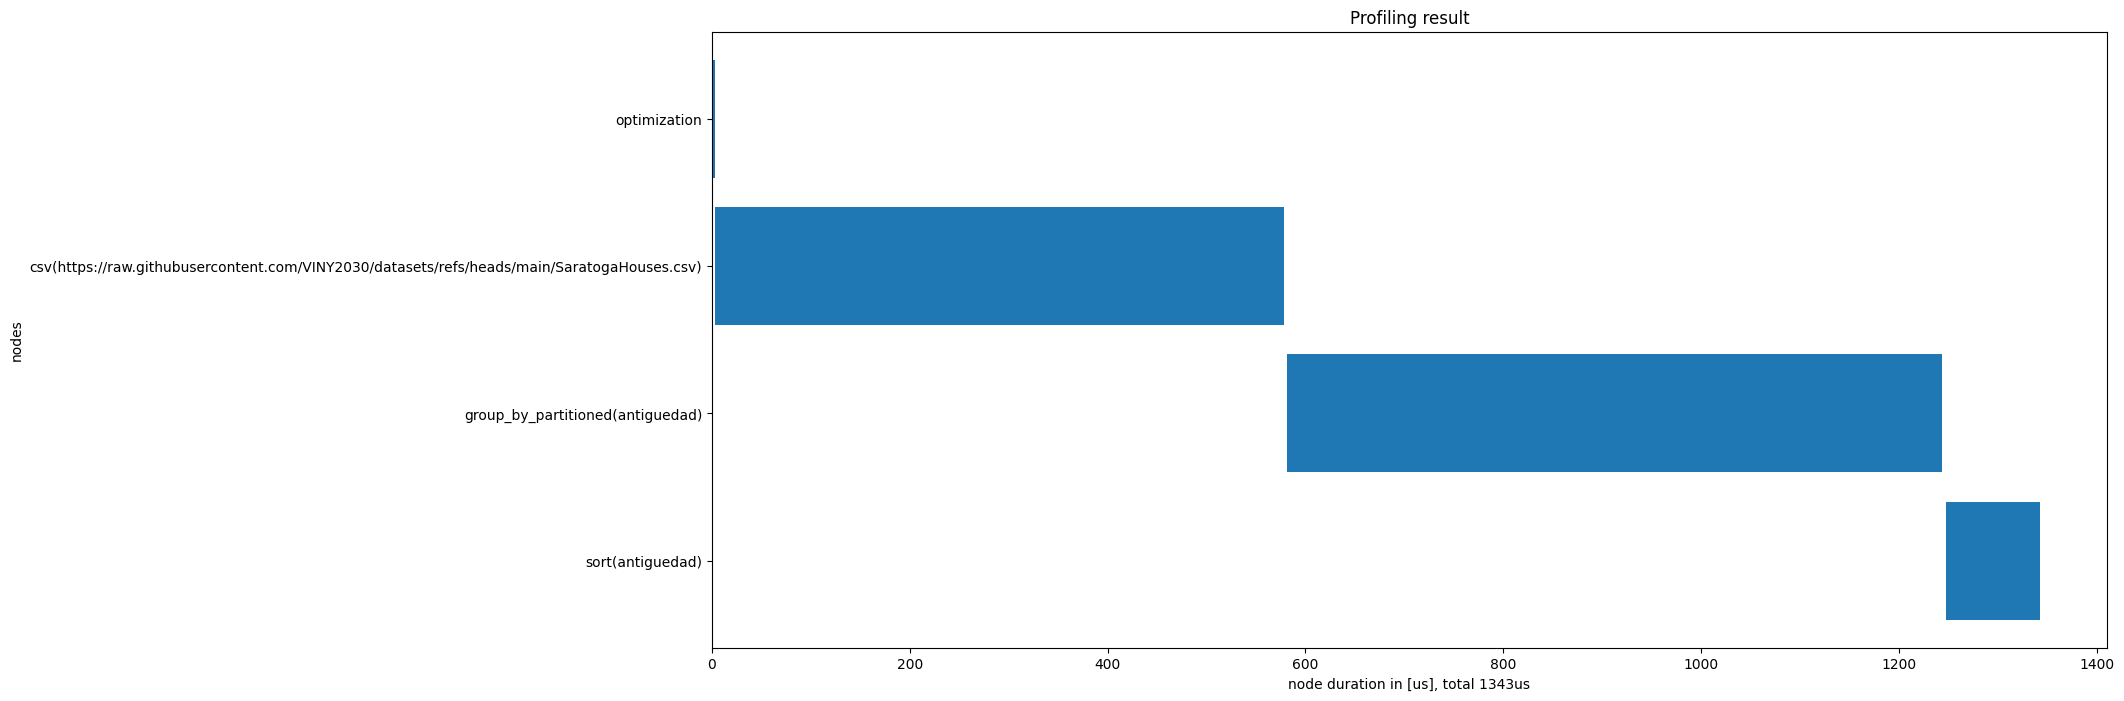

(shape: (136, 2)
 ┌────────────┬──────────────┐
 │ antiguedad ┆ suma_precios │
 │ ---        ┆ ---          │
 │ i64        ┆ i64          │
 ╞════════════╪══════════════╡
 │ 225        ┆ 82800        │
 │ 201        ┆ 227000       │
 │ 178        ┆ 135000       │
 │ 176        ┆ 422680       │
 │ 174        ┆ 154000       │
 │ …          ┆ …            │
 │ 4          ┆ 6271000      │
 │ 3          ┆ 9727250      │
 │ 2          ┆ 5642600      │
 │ 1          ┆ 22752834     │
 │ 0          ┆ 22221338     │
 └────────────┴──────────────┘,
 shape: (4, 3)
 ┌─────────────────────────────────┬───────┬──────┐
 │ node                            ┆ start ┆ end  │
 │ ---                             ┆ ---   ┆ ---  │
 │ str                             ┆ u64   ┆ u64  │
 ╞═════════════════════════════════╪═══════╪══════╡
 │ optimization                    ┆ 0     ┆ 3    │
 │ csv(https://raw.githubusercont… ┆ 3     ┆ 578  │
 │ group_by_partitioned(antigueda… ┆ 581   ┆ 1243 │
 │ sort(antiguedad)     

In [111]:
from polars import col

query_df = df.group_by('antiguedad').agg(  ## agrupe pór antiguedad
    suma_precios=col('precio').sum() ## agregue suma de precios y ordene por antiguedad
).sort('antiguedad', descending=True)

query_df.profile(show_plot=True)  ## profile duracion de los procesos en microsegundos

# **<font color="#07a8ed">Lazy Frame con  Gran Marco de Datos Perezoso-100 millones de registros?**

In [113]:
!pip install polars -U

In [114]:
!pip install polars[gpu] --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
INFO: pip is looking at multiple versions of cudf-polars-cu12 to determine which version is compatible with other requirements. This could take a while.
  Using cached polars-1.13.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached polars-1.13.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached polars-1.12.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached polars-1.11.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached polars-1.10.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached polars-1.9.0-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
  Using cached polars-1.8.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
Using cached polars-1.8.2-cp38-abi3-manylinux_2_17_x86_64.m

In [115]:
import polars as pl

In [116]:
import numpy as np

In [117]:
%%time
np.random.seed(0)

num_rows = 100_000_000
num_columns = 6

# Crear un marco de datos con datos aleatorios
# Cambiado: pase los datos y los nombres de la columna utilizando el argumento del esquema
data = np.random.randint(0, 100, size=(num_rows, num_columns))
schema = {f'Column_{i}': pl.Int64 for i in range(1, num_columns + 1)}
df_polars = pl.LazyFrame(data, schema=schema)
df_polars

CPU times: user 5.63 s, sys: 828 ms, total: 6.46 s
Wall time: 6.43 s


In [118]:
%time
df_polars.collect()  ## 100 millones de registros y 6 columnas

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


Column_1,Column_2,Column_3,Column_4,Column_5,Column_6
i64,i64,i64,i64,i64,i64
44,47,64,67,67,9
83,21,36,87,70,88
88,12,58,65,39,87
46,88,81,37,25,77
72,9,20,80,69,79
…,…,…,…,…,…
13,6,67,74,86,84
62,63,75,85,8,15
96,45,61,51,44,59


☹ Final

